# Nothing But NumPy: A 3-layer Binary Classification Neural Network on Iris Flowers

Part of the blog ["Nothing but NumPy: Understanding & Creating Binary Classification Neural Networks with Computational Graphs from Scratch"](https://medium.com/@rafayak/nothing-but-numpy-understanding-creating-binary-classification-neural-networks-with-e746423c8d5c)- by [Rafay Khan](https://twitter.com/RafayAK)

In this notebook we'll create a 3-layer neural network (i.e. one input one, one hidden layer and one output layer) and train it on Iris dataset using _only_ **sepals** as input features to classify **Iris-virginica vs. others**

First, let's import NumPy, our neural net layers, the Binary Cross-Entropy(bce) Cost function and helper functions.

_Feel free to look into the helper functions in the utils directory._

In [1]:
import numpy as np
from Layers.LinearLayer import LinearLayer
from Layers.ActivationLayer import SigmoidLayer
from util.utilities import *
from util.cost_functions import compute_stable_bce_cost
import matplotlib.pyplot as plt

# to show all the generated plots inline in the notebook
%matplotlib inline

![](imgs/verg_vs_other.png)

For convenience we'll load the data through [scikit-learn](https://scikit-learn.org/stable/index.html#). 

If you don't have it installed please refer to this [link](https://scikit-learn.org/stable/install.html)

In [2]:
# load data from scikit-learn's datasets module
from sklearn.datasets import load_iris

iris = load_iris()  # returns a python dictionary with the dataset

Let's see what the dataset contains:

In [3]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

- **data**: contains the 4 features of each example in a row, has 150 rows
- **target**: contains the label for each example _(0->setosa, 1->versicolor, 2->virginica)_
- **target_names**: contains the names of each target label
- **DESCR**: contains the desription of the dataset
- **feature_names**: contains the names of the 4 features(sepal length, sepal width, petal length, petal width)
- **filename** : where the file is located on the computer


Let's explore the data:

In [4]:
iris.data.shape  # rows(examples), cols(features)

(150, 4)

In [5]:
iris.target.shape # labels for 150 flowers 

(150,)

In [6]:
iris.target_names  # print the name of the 3 labels(species) an example could belong to

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [7]:
iris.feature_names  # name of each feature in data's columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.data[:5, :]  # print first 5 examples from the Iris dataset

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [9]:
iris.target[:5]  # print labels for the first 5 examples in the Iris dataset

array([0, 0, 0, 0, 0])

So, the data of the **first** 5 examples looks as follows:

| exmaple# | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | target | target name|
| --- | --- | --- || --- | --- | --- |
| 0 | 5.1 | 3.5 | 1.4 |  0.2| 0|  setosa
| 1 |4.9|  3. |  1.4|  0.2|0|  setosa
| 2 |4.7|  3.2|  1.3|  0.2|0|  setosa
| 3 |4.6|  3.1|  1.5|  0.2|0|  setosa
| 4 |5. |  3.6|  1.4|  0.2|0|  setosa

For our model we will only use **sepal length and sepal width** to classify whether the Iris flower is _virginica_ or _other_

In [10]:
# take only sepal length(0th col) and sepal width(1st col)
X = iris.data[:, :2] 

# fix the labes shape so that instead of (150,) its (150,1),
# helps avoiding weird broadcasting errors
Y = (iris.target).reshape((150, 1))  

In [11]:
X.shape

(150, 2)

In [12]:
Y.shape

(150, 1)

**Notice** in the table above that the first 5 examples belong to __'setosa'__ species, this pattern continues in the dataset(the pattern is all _setosa_ examples followed by _versicolor_ examples and finally _virginica_ examples). ___A good practice is to randomize the data before training a neural network, so that the neural network does not, by accident, learn a trivial ordering pattern in the data.___

So let's randomize the data

In [13]:
np.random.seed(48)  # for reproducible randomization 
random_indices = np.random.permutation(len(X))  # genrate random indices

X_train = X[random_indices]
Y_train = Y[random_indices]

Now let's again print the first 5 examples and see the results(note this time there are only two features - _sepal lenght_, _sepal width_ )

In [15]:
X_train[:5, :]

array([[ 5.7,  2.9],
       [ 6.1,  2.8],
       [ 6.1,  2.6],
       [ 4.5,  2.3],
       [ 5.9,  3.2]])

In [16]:
Y_train[:5]

array([[1],
       [1],
       [2],
       [0],
       [1]])

Now, the data of the **first** 5 examples looks as follows:

| exmaple# | sepal length (cm) | sepal width (cm) | target | target name|
| --- | --- | --- || --- | 
| 0 |  5.7|  2.9| 1|  versicolor 
| 1 |  6.1|  2.8| 1|  versicolor
| 2 |  6.1|  2.6| 2|  virginica
| 3 |  4.5|  2.3| 0|  setosa
| 4 |  5.9|  3.2| 1|  versicolor


Finally, let's put the training set(`X_train`)  & and labels(`Y_train`) in the correct shape `(feat, examples)` and `(examples,1)`, respectively. Also we'll make the target label ___virginica=1___ and the rest ___0___.  

In [17]:
# Transpose the data so that it's in the correct shape 
# for passing through neural network
# also binarize the classes viginica=1 and the rest 0
X_train = X_train.T
Y_train = Y_train.T  
Y_train = (Y_train==2).astype('int')  # uses bool logic  to binarize labels, wherever label=2 output True(1) rest Flase(0)           

In [18]:
print("Shape of training data, X_train: {}".format(X_train.shape))
print("Shape of  labels, Y_train: {}".format(Y_train.shape))

Shape of training data, X_train: (2, 150)
Shape of  labels, Y_train: (1, 150)


In [19]:
Y_train[:, :5]  # print first five examples

array([[0, 0, 1, 0, 0]])

Before training the neural net let's visulaize the data: 

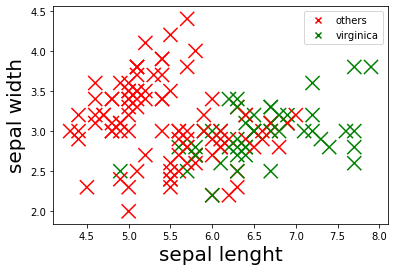

In [20]:
cmap = matplotlib.colors.ListedColormap(["red", "green"], name='from_list', N=None)
# scattter plot
scatter = plt.scatter(X_train.T[:, 0], X_train.T[:, 1], 
            s=200, c=np.squeeze(Y_train.T), 
            marker='x', cmap=cmap)  # s-> size of marker

plt.xlabel('sepal lenght', size=20)
plt.ylabel('sepal width', size=20)

plt.legend(scatter.legend_elements()[0], ['others', 'virginica'])

plt.show()

### Notice that this data is very tough to classify perfectly, as many of the data points are intertwined( i.e some green and red points are too close to each other) 

***
***

#### Now we are ready to setup and train the Neural Network

This is the neural net architecture we'll use

![](imgs/2in_3_layer_NN.png)

In [21]:
# define training constants
learning_rate = 1
number_of_epochs = 10000

np.random.seed(48) # set seed value so that the results are reproduceable
                  # (weights will now be initailzaed to the same pseudo-random numbers, each time)


# Our network architecture has the shape: 
#           (input)--> [Linear->Sigmoid] -> [Linear->Sigmoid] -> [Linear->Sigmoid] -->(output)  

#------ LAYER-1 ----- define 1st hidden layer that takes in training data 
Z1 = LinearLayer(input_shape=X_train.shape, n_out=5, ini_type='xavier')
A1 = SigmoidLayer(Z1.Z.shape)

#------ LAYER-2 ----- define 2nd hidden layer that takes in values from 1st-hidden layer
Z2= LinearLayer(input_shape=A1.A.shape, n_out= 3, ini_type='xavier')
A2= SigmoidLayer(Z2.Z.shape)


#------ LAYER-3 ----- define output layer that takes in values from 2nd-hidden layer
Z3= LinearLayer(input_shape=A2.A.shape, n_out=1, ini_type='xavier')
A3= SigmoidLayer(Z3.Z.shape)

Now we can start the training loop:

In [22]:
costs = [] # initially empty list, this will store all the costs after a certian number of epochs

# Start training
for epoch in range(number_of_epochs):
    
    # ------------------------- forward-prop -------------------------
    Z1.forward(X_train)
    A1.forward(Z1.Z)
    
    Z2.forward(A1.A)
    A2.forward(Z2.Z)
    
    Z3.forward(A2.A)
    A3.forward(Z3.Z)
    
    # ---------------------- Compute Cost ----------------------------
    cost, dZ3 = compute_stable_bce_cost(Y=Y_train, Z=Z3.Z)
    
    # print and store Costs every 100 iterations and of the last iteration.
    if (epoch % 100) == 0 or epoch == number_of_epochs - 1:
        print("Cost at epoch#{}: {}".format(epoch, cost))
        costs.append(cost)
    
    # ------------------------- back-prop ----------------------------
    
    Z3.backward(dZ3)
    
    A2.backward(Z3.dA_prev)
    Z2.backward(A2.dZ)
    
    A1.backward(Z2.dA_prev)
    Z1.backward(A1.dZ)
    
    # ----------------------- Update weights and bias ----------------
    Z3.update_params(learning_rate=learning_rate)
    Z2.update_params(learning_rate=learning_rate)
    Z1.update_params(learning_rate=learning_rate)

Cost at epoch#0: 0.6667400084592768
Cost at epoch#100: 0.6302928461973847
Cost at epoch#200: 0.5709289459585686
Cost at epoch#300: 0.5186742755369246
Cost at epoch#400: 0.459962391632051
Cost at epoch#500: 0.4513239451183089
Cost at epoch#600: 0.4474114673868234
Cost at epoch#700: 0.44591618452429194
Cost at epoch#800: 0.4440500019262934
Cost at epoch#900: 0.4445422747431329
Cost at epoch#1000: 0.4447222560300399
Cost at epoch#1100: 0.44468895649070467
Cost at epoch#1200: 0.444513016851467
Cost at epoch#1300: 0.44424310464735944
Cost at epoch#1400: 0.4439079365579478
Cost at epoch#1500: 0.44352277927682443
Cost at epoch#1600: 0.44309484495031315
Cost at epoch#1700: 0.4426269032540103
Cost at epoch#1800: 0.44211962268537824
Cost at epoch#1900: 0.44157314460972397
Cost at epoch#2000: 0.4409881537658576
Cost at epoch#2100: 0.44036652067718157
Cost at epoch#2200: 0.4397115203535574
Cost at epoch#2300: 0.4390276642670329
Cost at epoch#2400: 0.43832025974366723
Cost at epoch#2500: 0.43759486

Now let's see how well the neural net peforms on the training data after the training as finished

`predict` helper functionin the cell below returns three things:

* `p`: predicted labels (output 1 if predictded output is greater than classification threshold `thresh`)
* `probas`: raw probabilities (how sure the neural net thinks the output is 1, this is just `P_hat`)
* `accuracy`: the number of correct predictions from total predictions



In [23]:
classifcation_thresh = 0.5


predicted_outputs, p_hat, accuracy = predict(X=X_train, Y=Y_train, 
                                             Zs=[Z1, Z2, Z3], As=[A1, A2, A3], thresh=classifcation_thresh)

print("The predicted outputs of first 5 examples: \n{}".format(predicted_outputs[:,:5]))
print("The predicted prbabilities of first 5 examples:\n {}".format(np.round(p_hat[:, :5], decimals=3)) )
print("\nThe accuracy of the model is: {}%".format(accuracy))

The predicted outputs of first 5 examples: 
[[ 0.  1.  1.  0.  0.]]
The predicted prbabilities of first 5 examples:
 [[ 0.355  0.579  0.549  0.067  0.366]]

The accuracy of the model is: 80.66666666666666%


#### The Learning Curve

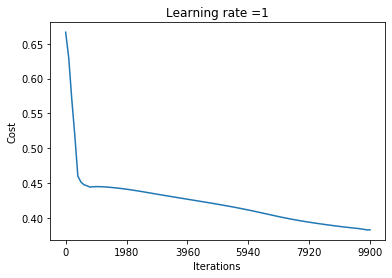

In [24]:
plot_learning_curve(costs, learning_rate, total_epochs=number_of_epochs)

#### The Decision Boundary

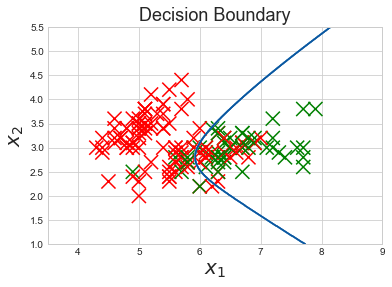

In [25]:
plot_decision_boundary(lambda x: predict_dec(Zs=[Z1, Z2, Z3], As=[A1, A2, A3], X=x.T, thresh=classifcation_thresh), 
                       X=X_train.T, Y=Y_train)

#### The Shaded Decision Boundary

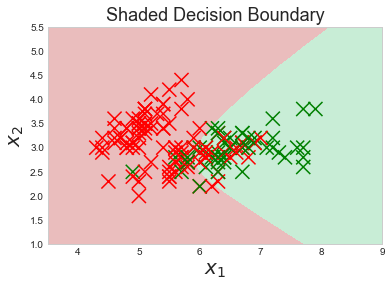

In [26]:
plot_decision_boundary_shaded(lambda x: predict_dec(Zs=[Z1, Z2, Z3], As=[A1, A1, A3], X=x.T, thresh=classifcation_thresh), 
                       X=X_train.T, Y=Y_train)

## Bounus

Train this dataset using only a 1-layer or 2-layer neural network

_(Hint: works slightly better)_